# Training the Perceptron Neural Network

In this section, we will discuss about training neural networks based on perceptron. The training process is crucial for the accuracy of an artificial intelligence.

## Training

<p style='text-align: justify;'> 
Training a perceptron neural network is an essential process for those who wish to work with machine learning. This technique is used to teach a machine to recognize patterns and perform specific tasks such as image classification, voice recognition, and data analysis.
 

* The training process involves adjusting the weights of the connections between the neurons in the network, in order to minimize the error in the network's output. This is done through a learning algorithm, which is responsible for updating the weights at each iteration of the training process.

* With proper training, it is possible to create perceptron neural network models capable of performing complex tasks with great accuracy, which can be very useful in various fields, such as healthcare, finance, and technology.
    
</p> 

## The Weights

<p style='text-align: justify;'>
Within a neural network, the most essential components for decision making are precisely the weights that each parameter will possess. Obtaining a neural network with a high level of accuracy implies having a network with its parameter weights very well defined. In general, the weights will basically be how relevant each parameter will be in that decision making.
</p>    

## ☆ Challenger: Classification of Roses and Violets  ☆

Consider the following problem:

**Roses are red, violets are blue, the stems of roses are tall, and violets are short.**

Then:

- Having the color spectrum between $red = 0$ and $blue = 10$.

- Between $0$ and $10$, there is a mixture of the two colors, where the closer to $0$ is redder, and the closer to $10$ is bluer.

- Given a set of pairs with (height and color) determine whether it is a rose or a violet.

<p style="text-align: center;">
 <img src="images/figure3_rosesXviolets.png"  width="500" height="500">
</p>

1. Create a Training the Perceptron Neural Network with Intel® Python.

2. Formulate the labels (known data) for this problem.

3. Use the Trained Perceptron to classify whether they are pink or violet, and answer:
    
    - ``How many did she get right and wrong?``
    
    - ``What is the difference with and without training?``

### ☆ Solution ☆ 

&emsp;Having understood the basic concepts of neural network training, now is the time to implement code capable of training a network.

#### ⊗ Import Python Packages

&emsp;First of all, we need to import the libraries that we will use for training.

In [1]:
# Python packages
import numpy as np
import math
import random
from matplotlib import pyplot as plt

#### ⊗ Create the perceptron class

<p style='text-align: justify;'>
The next step is to create a class that will be responsible for representing the perceptron in our model. This class will have the attributes that characterize our perceptron and also the functions that will represent the actions it will be performing. Among the existing attributes, we have:
</p>    

* **input_size** - the number of parameters that the input data will have;
* **learning_rate** - the value at which the weights will be changed;
* **activation_fn** - the activation function of the neural network;
* **W** - the weights of each parameter within our network.

In the Perceptron class, we also have two functions, predict and fit.

<p style='text-align: justify;'>
The predict function aims to make the final prediction for a given input. That is, this is the function responsible for the final response of the model to a given input data. The other function is fit, which in turn is responsible for training the neural network by adjusting its weight every time it makes a prediction.
</p>

In [2]:
# Perceptron class with it's own functions and attributes
# Activation function: sigmoid
def sig(x):
 return 1 / (1 + math.exp(-x))

class Perceptron:
    def __init__(self, input_size=2, learning_rate=0.1, activation_fn = sig):
        self.input_size = input_size 
        self.learning_rate = learning_rate 
        self.activation_fn = activation_fn 
        self.W = np.random.uniform(-1, 1, size=(input_size)) # Initializes the weights with random values.

    # Prediction function, receives an input and returns 1 (pink) or 0 (violet)
    def predict(self, x): 
        z = self.W.dot(x)  # Dot product between self.W transpose and x
        a = self.activation_fn(z) # Insert z into the activation function to obtain the final prediction result: > 0.5 (rose) or <= 0.5 (violet)
  
        if(a > 0.5):
            return 1 #rose
        else:
            return 0 # violet

    # Perceptron training function, X = input, y = expected output, epochs = number of times it will train
    def fit(self, X, y, epochs):  
        for epoch in range(epochs):
            for i in range(len(X)): 
                x = X[i]            
                y_true = y[i]
                y_pred = self.predict(x) 
                error = y_true - y_pred  # Calculate if there was an error in the prediction or not, 1 (had an error) or 0 (had no error).
                self.W += self.learning_rate * error * x # Update the weights, if the result is correct the weights are not changed.

<p style='text-align: justify;'>
After creating the class to represent a perceptron we need to develop a function to test the prediction results. To do this, we can use the logic below present in the function test_plant, where its objective is to test the plants individually, receiving as input parameters their height and color and returning as output whether the plant is closer to a violet or a rose.
</p>

In [3]:
# Test individual plants
def test_plant(color, steam): 
    plant = np.array([color, steam]) # Create an instance of the plant
    result = perceptron.predict(plant)
    return result

To facilitate the task of testing all plants, we can create a function that has this objective. Therefore, the function that will test all existing plants in the test cases is shown below.

In [4]:
# Test all plants
def test_all_plants(X): 
    result_array = []
    for i in range(len(X)):        
        x = X[i]          
        result_array.append(test_plant(x[0], x[1]))
    return result_array

Before starting the training, we need to instantiate the perceptron so that we can use the functionalities we created for it. To do this, just execute the code below where we will be initializing a perceptron with known values in its parameters.

In [5]:
# Create an instance of Perceptron to classify roses and violets
perceptron = Perceptron(input_size=2, learning_rate=0.1, activation_fn=sig )

<p style='text-align: justify;'>
Now with all the functions developed, we can move on to the training and accuracy testing stage of our neural network. First, we must establish some training data. The variable $X$ is a vector of plants, where $X_1$ represents the height and $X_2$ represents the color of that plant. All values present in the vector were randomly chosen only to train the neural network. Just a reminder that $X_1$ represents the height of the plants, not having a defined limit by the problem, while $X_2$ represents the color, which has a limit of $0$ to $10$ previously established.
</p>

In [6]:
# X = ([[color, stem], [color, stem] ...]) = np.array([
X = np.array([
             [ 0, 5 ],  # Rose
             [ 1, 12 ], # Rose
             [ 2, 11 ], # Rose
             [ 2, 10 ], # Rose
             [ 2, 18 ], # Rose
             [ 3, 11 ], # Rose
             [ 5, 1 ],  # Rose
             [ 6, 4 ],  # Violet
             [ 7, 1 ],  # Violet 
             [ 8, 9 ],  # Violet
             [ 9, 4 ]   # Violet                              
])

<p style='text-align: justify;'>
After creating the test plants, we need to tell what is expected for each test input so that it is possible to train our neural network. To do this, just specify the result for each test case ($X_1$ and $X_2$) present in the example above. Below is an example of expected outputs for the inputs.
</p>

In [7]:
# Define the expected outputs for each input, 1 = Rose, 0 = Violet
y = np.array([1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0])

<p style='text-align: justify;'>
After determining the training data for each plant, we will plot a graph for better visualization. The graph representation will have two values, $[X,Y]$, where $X$ represents the height and $Y$ represents the color. Remembering that all values chosen for height and color were chosen randomly.
</p>

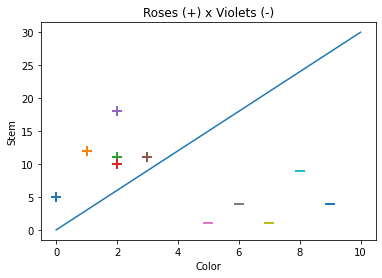

In [8]:
# Visualization - Plot the samples
for result, input in zip(y, X):
    if result == 1: # rose
        plt.scatter(input[0], input[1], s=120, marker='+', linewidths=2)
    else: # violet
        plt.scatter(input[0], input[1], s=120, marker='_', linewidths=2)

# Print a possible hyperplane, that is seperating the two classes.
plt.xlabel('Color')
plt.ylabel('Stem')
plt.title('Roses (+) x Violets (-)')
plt.plot([0,10],[0,30])
plt.show()

<p style='text-align: justify;'>
After declaring both the training cases and the expected outputs, just use the fit function to train the neural network. In the parameter of the function, we have the epochs attribute, which is the number of times we will repeat the process of training our neural network. Below is an example of training our network.
</p>    

In [9]:
perceptron.fit(X, y, epochs=1000) # Trains the Perceptron with the training data

<p style='text-align: justify;'>
Before moving on to the next step, we need to define some plants that will be used as test cases to validate the accuracy of our neural network. This can be done as follows. Again, the values for heights and colors were chosen randomly.
</p>    

In [10]:
# Tests the model and returns the results
X_test = np.array([
             [ 1, 10 ],  # Rose
             [ 2, 25 ],  # Rose
             [ 3, 22 ],  # Rose
             [ 4, 20 ],  # Rose
             [ 5, 23 ],  # Rose
             [ 6, 1 ],   # Violet
             [ 7, 8 ],   # Violet
             [ 8, 1 ],   # Violet
             [ 9, 10 ],  # Violet
             [ 10, 8 ],  # Violet                             
])

<p style='text-align: justify;'>
With the neural network properly trained, we just need to collect the test results using the test_all_plants function and passing the chosen test cases as a parameter.
</p>    

In [11]:
# Gets the results obtained by passing all tests
yResult = test_all_plants(X_test)

<p style='text-align: justify;'>
After doing this, we will have the final outputs for the obtained test cases. To determine the accuracy of our network, we just need to compare the results obtained at the end of the training with the expected results. 
</p>

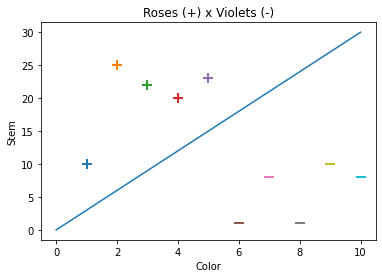

In [12]:
# Visualization - Plot the samples
for result, input in zip(yResult, X_test):
    if result == 1: # Rose
        plt.scatter(input[0], input[1], s=120, marker='+', linewidths=2)
    else: # Violet
        plt.scatter(input[0], input[1], s=120, marker='_', linewidths=2)

# Print a possible hyperplane, that is seperating the two classes.
plt.xlabel('Color')
plt.ylabel('Stem')
plt.title('Roses (+) x Violets (-)')
plt.plot([0,10],[0,30])
plt.show()

## Summary

<p style='text-align: justify;'>
Training the Perceptron Neural Network is necessary in order to increase assertiveness
of the classification.  This notebook discussed the concepts of train the Perceptron and how use this in a good classification.
</p>

## Clear the Memory

Before moving on, please execute the following cell to clear up the CPU memory. This is required to move on to the next notebook.

In [13]:
import IPython
app = IPython.Application.instance()
app.kernel.do_shutdown(True)

{'status': 'ok', 'restart': True}

## Next

In this section you learned how to train a simple Perceptron Neural Network with Python for data classification. In the next section, you will be asked to build your own Perceptron with perform data preparation to solve a different data classification with the [_Intel® Scikit Learn Extensions_](https://scikit-learn.org/stable/) package in the notebook [_04-percepetron-scikit-learning.ipynb_](04-percepetron-scikit-learning.ipynb).